# Importing Libraries

In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import re
import pickle

# Text to vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# splitting the dataset
from sklearn.model_selection import train_test_split

# nltk lib for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Reading the data

In [ ]:
data = pd.read_csv('/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv')

In [ ]:
# duplicating the data
test_data = data.copy()

In [ ]:
# data 
test_data.head(5)

# Droping unwanted columns

In [ ]:
test_data.drop(["reviewerID", "asin", "reviewerName", "helpful", "unixReviewTime", "reviewTime",], axis = 1, inplace = True)

In [ ]:
test_data.head(5)

In [ ]:
# combaining both text data
combined = test_data['reviewText'] + test_data['summary']


# Cleaning Text Data

## I have written an brief notebook about [Text Cleaning](https://www.kaggle.com/prasad789/text-pre-processing-cleaning)

In [ ]:
def decontracted(phrase):
    # replace '
    phrase = phrase.replace('’', '\'')
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def line_breaks(phrase_1):
    phrase_1 = phrase_1.replace('\\r', ' ')
    phrase_1 = phrase_1.replace('\\"', ' ')
    phrase_1 = phrase_1.replace('\n', ' ')
    return phrase_1

def remove_special_character(phase_2):
    phase_2 = re.sub('[^A-Za-z0-9]+', ' ', phase_2)
    return(phase_2)

def remove_continues_char(s) :
    senta = ""
    for i in s.split():
        #print(i)
        if len(i) <= 15:
            
            senta += i
            senta += ' '
        else:
            pass
    return(senta)

# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

def stop_words(phrase):
    after = ' '.join(e for e in phrase.split() if e.lower() not in stopwords)
    return(after)

In [ ]:
preprocessed_titles = []
# tqdm is for printing the status bar
for review in tqdm(combined.values):
    review_1 = str(review)
    review_1 = decontracted(review_1)
    review_1 = line_breaks(review_1)
    review_1 = remove_special_character(review_1)
    review_1 = remove_continues_char(review_1)
    review_1 = stop_words(review_1)
    preprocessed_titles.append(review_1.lower().strip())

In [ ]:
test_data['combined'] = preprocessed_titles

# Vectorizing text data

## Bag of Words

In [ ]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(test_data['combined'].values) 

# we use the fitted CountVectorizer to convert the text to vector
bow = vectorizer.transform(test_data['combined'].values)

print("After vectorizations")
print(bow.shape)

## TFIDF Vectorizer

In [ ]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(test_data['combined'].values)

tfidf = vectorizer.transform(test_data['combined'].values)


print("After vectorizations")
print(tfidf.shape)


# Average Word to Vector

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

### I have posted a screenshot of jupyter notebook, because I cant upload an glove vector size of 128 mb to this notebook.

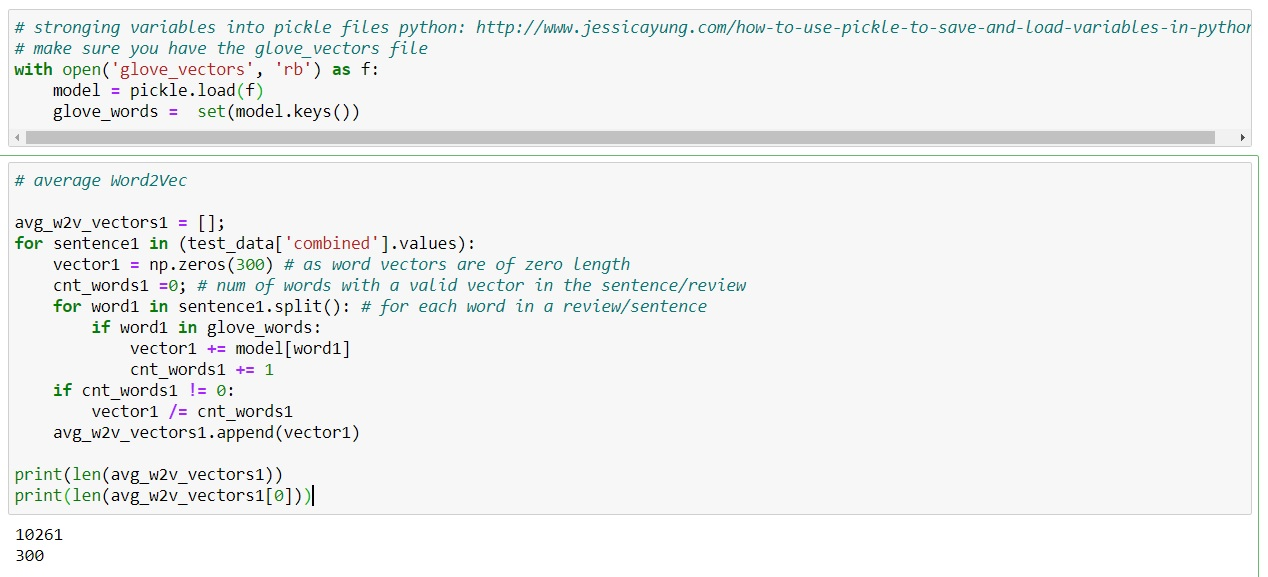

## TFIDF weighted WORD TO VECTOR 

### I have posted a screenshot of jupyter notebook, because I cant upload an glove vector size of 128 mb to this notebook.

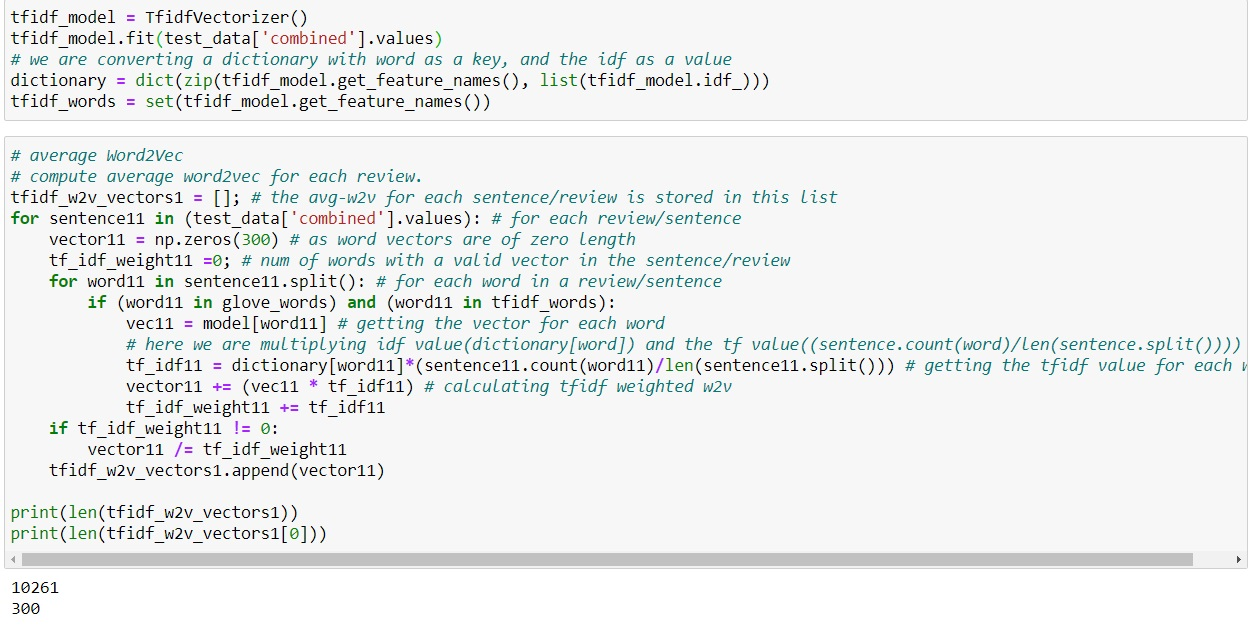

## Sentiment Analysis

In [ ]:
# import nltk

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

sida_X1_neg = []
sida_X1_pos = []
sida_X1_neu = []
sida_X1_compound = []
for sentence1 in (test_data['combined'].values): 
    ss = sid.polarity_scores(sentence1)
    sentiment_neg=ss['neg']
    sentiment_pos=ss['pos']
    sentiment_neu=ss['neu']
    sentiment_compound=ss['compound'] 
    sida_X1_neg.append(sentiment_neg)
    sida_X1_pos.append(sentiment_pos)
    sida_X1_neu.append(sentiment_neu)
    sida_X1_compound.append(sentiment_compound)


In [ ]:
negative = np.array(sida_X1_neg).reshape(-1,1)
positive = np.array(sida_X1_pos).reshape(-1,1)
neutral = np.array(sida_X1_neu).reshape(-1,1)
compound = np.array(sida_X1_compound).reshape(-1,1)

In [ ]:
print(negative.shape)
print(positive.shape)
print(neutral.shape)
print(compound.shape)

# Featues extended:
## 1. Bag of Words = 7985
## 2. TFIDF = 7985
## 3. Average Word to Vector = 300
## 3. TFIDF weighted Word to Vector = 300
## 4. Sentiment Analysis = 4